## Task: Predict Carbon Emissions Based on Satellite Observations

* You are provided with a time series satellite observations dataset extracted from Sentinel-5P satelite from 2019 to 2021.

* Your objective is to build a regression model that accurately predicts the amount of carbon emissions in the next years.

* Your target is the column: "emission".

* You are provided with the code to download and load the csv file.

* Your work will be evaluated based on the completion of the given tasks below.

* You are allowed to use any models or libraries you want.
    
---


In [1]:
import pandas as pd
import gdown
import kagglehub
import os

In [2]:
path = kagglehub.dataset_download("mohammad2012191/q3-data")

print("Path to dataset files:", path)

100%|██████████| 37.6M/37.6M [00:00<00:00, 195MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mohammad2012191/q3-data/versions/1


In [20]:
csv_path = os.path.join(path, "train.csv")

data = pd.read_csv(csv_path)
data.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


# EDA & Preprocessing

1. Drop the ID feature (ID_LAT_LON_YEAR_WEEK):

In [21]:
# IN-place modification
data.drop("ID_LAT_LON_YEAR_WEEK", axis=1, inplace= True)
data


,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


2. Check for the missing values and handle them.


In [22]:
print("Count of missing values before")
print(data.isnull().sum())
# There is missing Values
# To address this issue, we need to fill in these NaN values either by using (mean, median , or forward/backward fill)
data = data.fillna(data.median()) # filling using Median
print("Count of missing values after handling")
data.isnull().sum()


Count of missing values before
latitude                                        0
longitude                                       0
year                                            0
week_no                                         0
SulphurDioxide_SO2_column_number_density    14609
                                            ...  
Cloud_sensor_azimuth_angle                    484
Cloud_sensor_zenith_angle                     484
Cloud_solar_azimuth_angle                     484
Cloud_solar_zenith_angle                      484
emission                                        0
Length: 75, dtype: int64
Count of missing values after handling


,0
latitude,0
longitude,0
year,0
week_no,0
SulphurDioxide_SO2_column_number_density,0
...,...
Cloud_sensor_azimuth_angle,0
Cloud_sensor_zenith_angle,0
Cloud_solar_azimuth_angle,0
Cloud_solar_zenith_angle,0


3. Plot the "emission" histogram.

0         3.750994
1         4.025176
2         4.231381
3         4.305286
4         4.347317
           ...    
79018    29.404171
79019    29.186497
79020    29.131205
79021    28.125792
79022    27.239302
Name: emission, Length: 79023, dtype: float64


<ipython-input-24-73a0cb732fbc>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


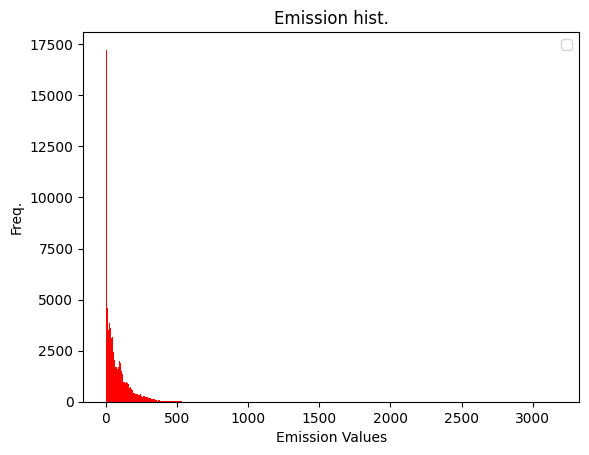

In [24]:
import matplotlib.pyplot as plt
y = data["emission"]
plt.hist(y, bins = 500, color="red") # y as values to be plotted with bin 500
plt.xlabel("Emission Values")
plt.ylabel("Freq.")
plt.title("Emission hist.")
plt.legend()
plt.show()


4. Plot the "latitude" and "longitude" using a scatter plot then colorize the points using the "emission" column.

<ipython-input-25-9c2222d6c4e9>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


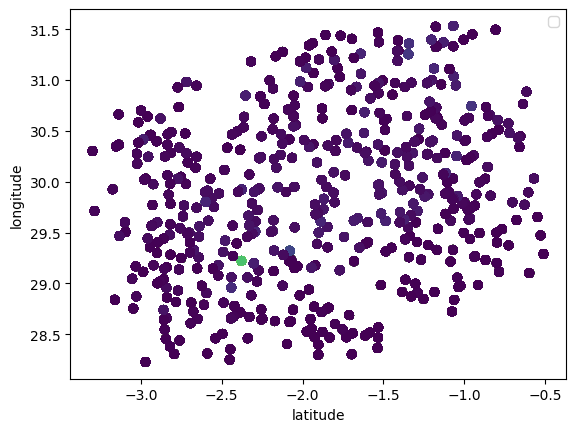

In [25]:
# Forming a scatter plot with latitude being the x_axis and the longitude being the y_axis

lat = data['latitude'] # latitude values
long = data['longitude'] # longitude Values
plt.scatter(lat, long, c = y) # The parameter c(color) is supposed to colorize the plot based on y (the emission array)
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.legend()
plt.show()


# Feature engineering

1. Add a new feature representing "Location" (To do that, you should convert "longitude" and "latitude" features to string type, concatenate them and add the result as a new feature).

In [26]:
#Convert the Columns longitude and latitued to strings then concatenate them and then assign them to "Location" column
data["Location"] =  data["longitude"].astype(str) + data["latitude"].astype(str)
data["Location"]

,Location
0,29.29-0.51
1,29.29-0.51
2,29.29-0.51
3,29.29-0.51
4,29.29-0.51
...,...
79018,30.301-3.299
79019,30.301-3.299
79020,30.301-3.299
79021,30.301-3.299


2. Add one aggregation feature representing the average emissions per location (You should groupby "Location" feature and take mean of the "emission", then merge the result to the data)

In [27]:
# Grouping and aggregating
aggre = data.groupby("Location").agg({'emission': 'mean'})
print(aggre)

# Rename the aggre columns to avoid confusion
aggre.columns = ["average_emissions_per_location"]
# Merging aggre into the data dataframe
data = data.merge(aggre, on="Location", how="left")
data

                emission
Location                
28.228-2.972    2.467351
28.249-2.451    2.636475
28.297-1.903    6.387735
28.304-1.696    0.000000
28.306-2.794    1.889199
...                  ...
31.45-0.95      2.254928
31.466-1.534    7.470541
31.494-0.806    4.994960
31.524-1.176   14.561755
31.532-1.068  261.904473

[497 rows x 1 columns]


,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,Location,average_emissions_per_location
0,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994,29.29-0.51,4.272966
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176,29.29-0.51,4.272966
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381,29.29-0.51,4.272966
3,-0.510,29.290,2019,3,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286,29.29-0.51,4.272966
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317,29.29-0.51,4.272966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171,30.301-3.299,27.633301
79019,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497,30.301-3.299,27.633301
79020,-3.299,30.301,2021,50,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205,30.301-3.299,27.633301
79021,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,...,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792,30.301-3.299,27.633301


3. Use Label encoder to encode all the categorical features

In [28]:
from sklearn.preprocessing import LabelEncoder
# Encoding using Label Encoder from sklearn
scale = LabelEncoder()
cat_cols = data.select_dtypes(include="object").columns
print(cat_cols)
for col in cat_cols:
  data[col] = scale.fit_transform(data[col])



Index(['Location'], dtype='object')


# Modeling

### Baseline:

1. Create a baseline using the "emission" median and calculate MAE score.

In [32]:


baseline_pred = np.full_like(y, y.mean())


baseline_MAE = mean_absolute_error(y, baseline_pred)

print(f"The baseline model has MAE {baseline_MAE}")


The baseline model has MAE 73.33081030501769


2. Perform a Time-Based Train-Test Split:
  * You will use the "year" column to split data manually using pandas.
  * Use all samples from 2019 and 2020 as the training set.
  * Use all samples from 2021 as the validation set.
  * Construct X_train, X_valid, y_train, y_valid

In [29]:
# Spliting the dataframe based on the specified condition
data_train = data[data["year"] <2021]
data_valid = data[data["year"] >= 2021]
# Constructing the X_train X_valid, y_train, y_valid manually
X_train, y_train = data_train.drop("emission", axis= 1), data_train["emission"]
X_valid, y_valid = data_valid.drop("emission", axis=1), data_valid["emission"]


3. Train a LGBMRegressor on the training data.

In [30]:
#IMporting the REGRESSOR
from lightgbm import LGBMRegressor
#Note: WE don't need to scale since we are using a Gradient Booster
model = LGBMRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17141
[LightGBM] [Info] Number of data points in the train set: 52682, number of used features: 69
[LightGBM] [Info] Start training from score 81.623719


4. Evaluate the Model on the validation data Using MAE

In [31]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_valid, y_pred)
print(f"The LGBMRegressor has MAE of {MAE}" )



The LGBMRegressor has MAE of 11.546847474336973


5. Plot the features importance of your model.

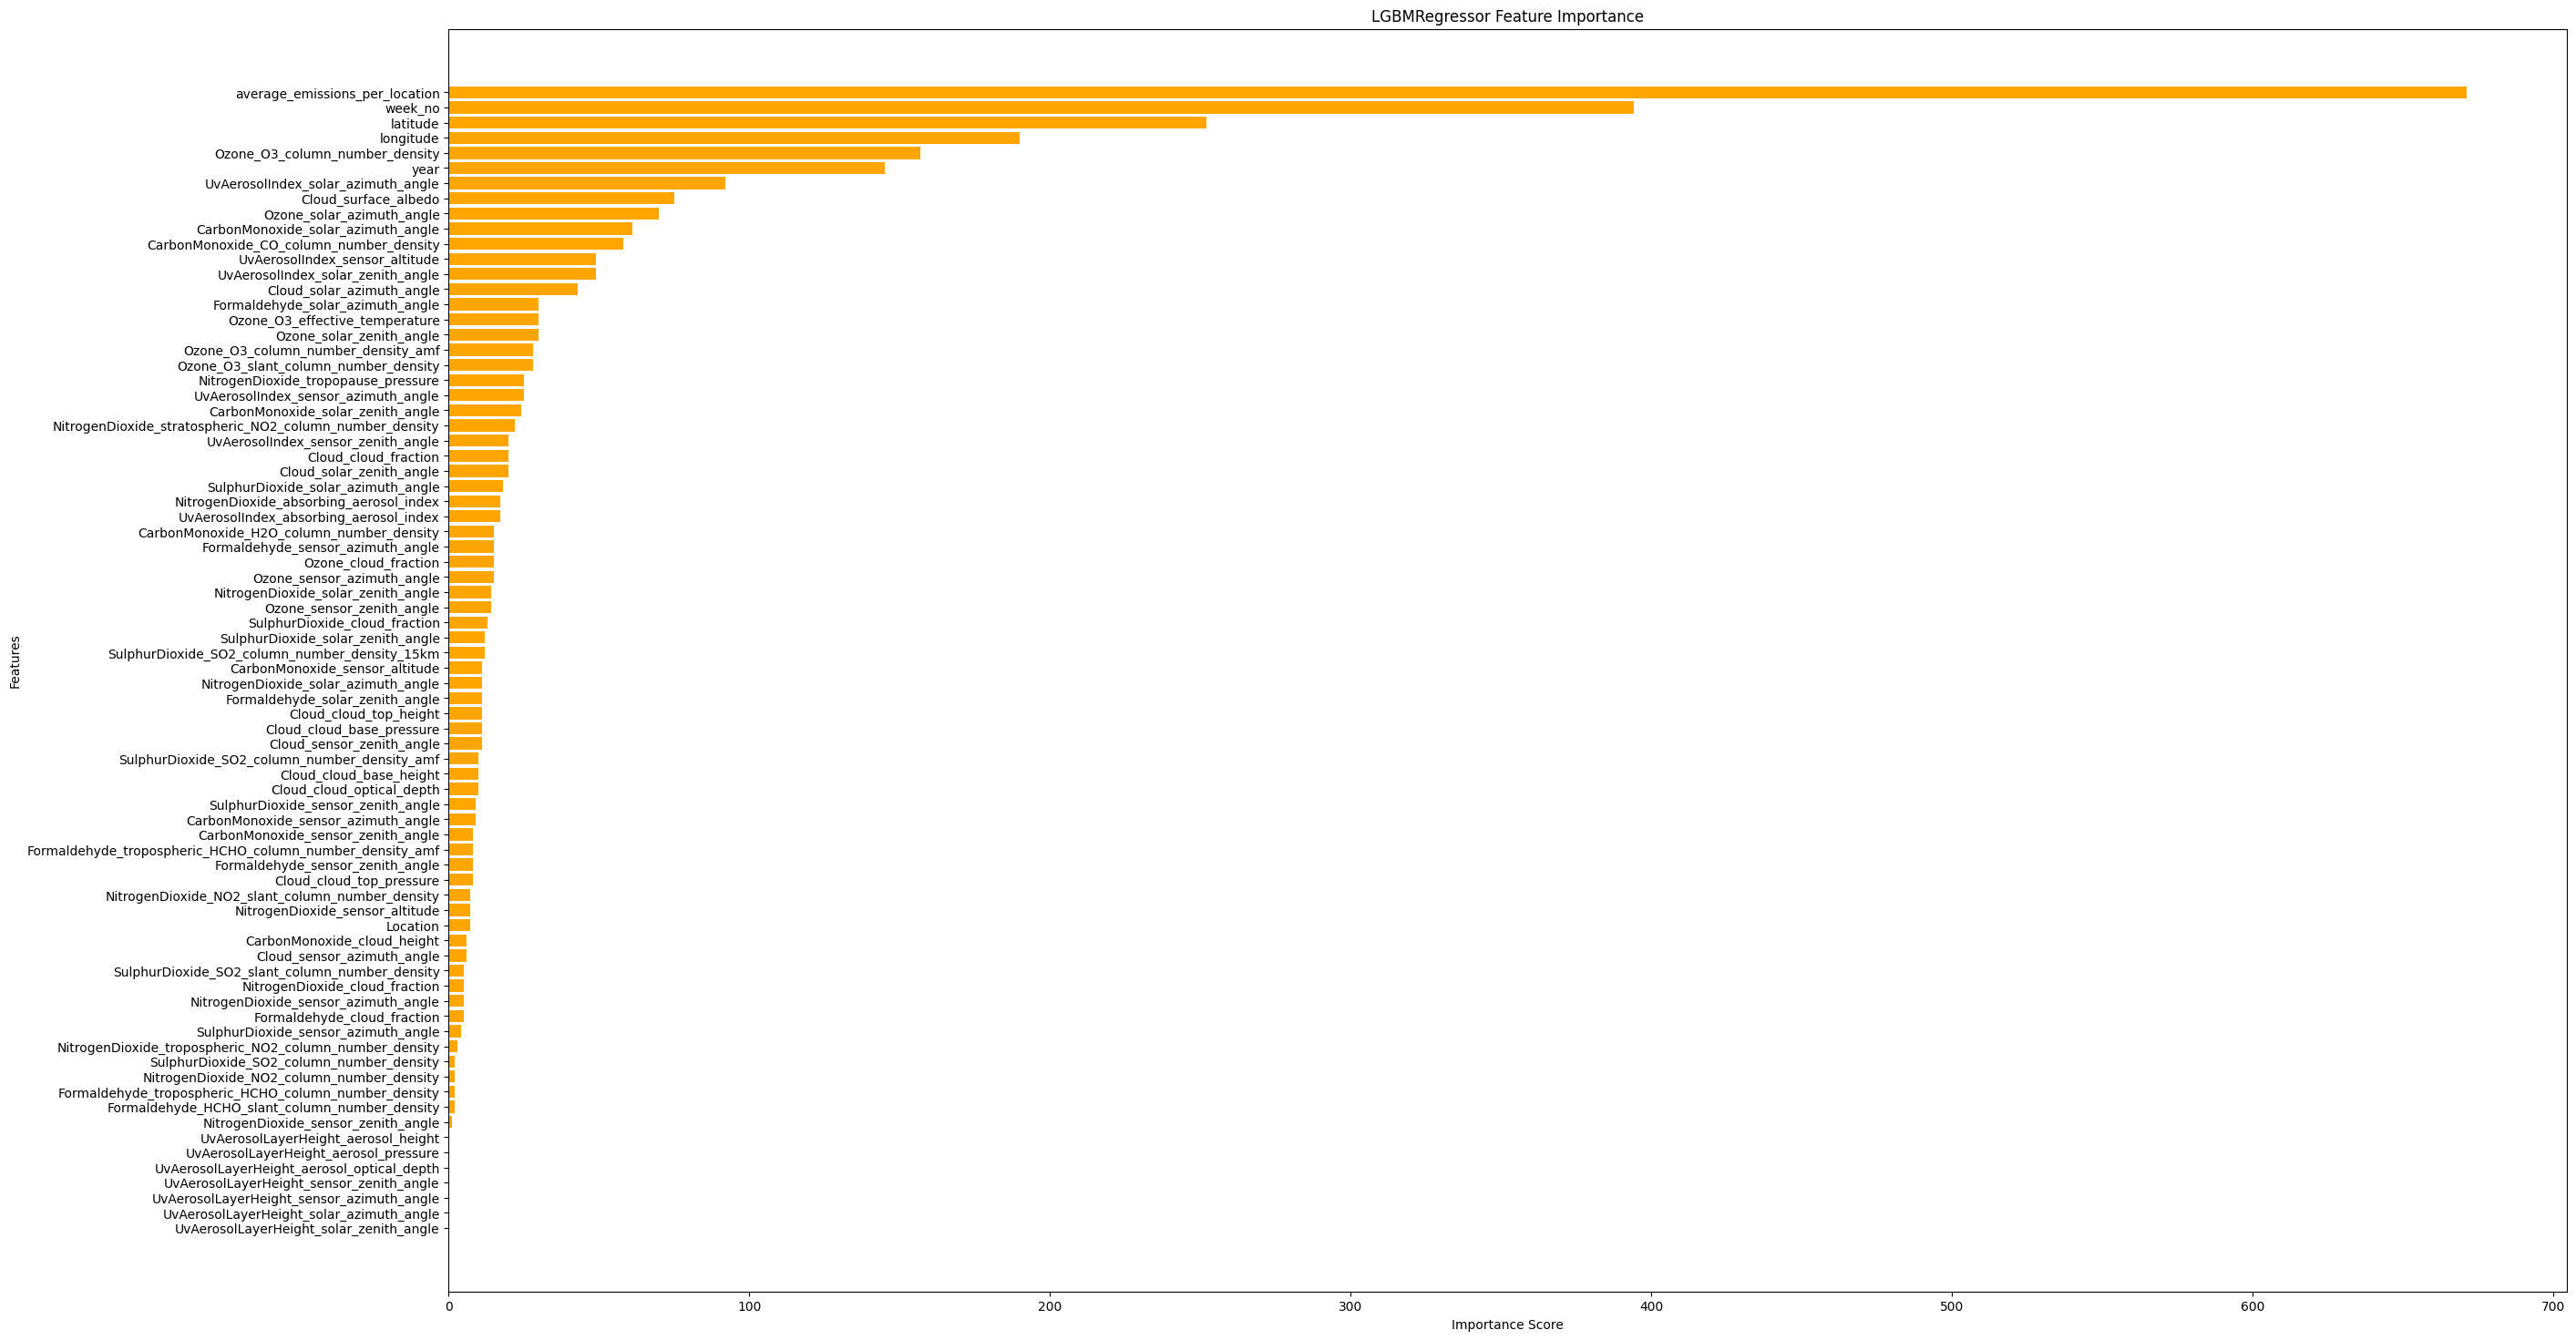

In [36]:
LGBMRegressor_importance = list(zip(X_train.columns, model.feature_importances_))
sorted_LGBMRegressor_importance = sorted(LGBMRegressor_importance, key=lambda x: x[1], reverse=True)

# Extracting the features and their coeff (importances) from the list of tuples using tuple unpacking
features, importances = zip(*sorted_LGBMRegressor_importance)

# Ploting the feature importance figure
plt.figure(figsize=(30, 18))
plt.barh(features, importances, color='orange')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('LGBMRegressor Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()


6. Plot the validation predictions using a histogram.

Good luck in the exam x)

Prepared by: Mohamed Eltayeb
